In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
rv = norm(loc=1, scale=0)

In [106]:
y = []
_x = np.linspace(-5, 5, 100)
for x in _x:
    y.append(norm.logcdf(x, loc=0, scale=1))

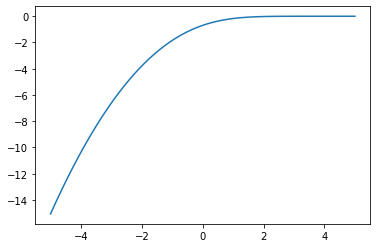

In [107]:
plt.plot(_x, y)

In [79]:
import math
x = np.array([1, 2])
sigma = np.identity(2)

a = np.array([12, 1])
b = np.array([2, 10])

d = a - b
print(x, d)

[1 2] [10 -9]


In [82]:
varAlongD = (d * sigma * d.T)[0]
print(np.sqrt(varAlongD))
meanAlongD = d.reshape(-1,).dot(x.reshape(-1,))
print(meanAlongD)
# norm.logcdf(meanAlongD, 0, np.sqrt(varAlongD))
np.log(norm.cdf(meanAlongD + 0.5, 0, np.sqrt(varAlongD)) - norm.cdf(meanAlongD - 0.5, 0, np.sqrt(varAlongD)))

[10.  0.]
-8


array([-3.54167366,         nan])

In [ ]:
norm.pdf()

In [112]:
norm(0, 1).rvs()

-0.894385450010955

# Log regression

In [9]:
import numpy as np
import src.bayes_logistic as bl

In [222]:
hidden_weights = np.array([0.8, 0.2])
utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1] 

range_1 = [0, 200]
range_2 = [-13, -1]

In [375]:
from random import randint

X = []
Y = []

w_prior = np.ones(len(hidden_weights)) / len(hidden_weights)

for _ in range(20):
    p1 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    p2 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    x = p1 - p2
    X.append(x)
    Y.append(float(utility(p1) >= utility(p2)))
    
    # Regression
    H_prior_diag = np.ones(len(hidden_weights)) #* (1.0 / 0.5) ** 2

    w_fit, H_fit = bl.fit_bayes_logistic(np.array(Y),
                                         np.array(X),
                                         w_prior,
                                         H_prior_diag)
    unnorm_w = w_fit
    sum_w = sum(unnorm_w)
    print(unnorm_w / sum_w)
#     w_prior = unnorm_w / sum_w
    


[0.5 0.5]
[0.4462467 0.5537533]
[0.44996756 0.55003244]
[0.45325618 0.54674382]
[0.45442364 0.54557636]
[0.45803761 0.54196239]
[0.46110878 0.53889122]
[0.4588046 0.5411954]
[0.36436661 0.63563339]
[0.36500573 0.63499427]
[0.43278542 0.56721458]
[0.43026367 0.56973633]
[0.42909915 0.57090085]
[0.4344432 0.5655568]
[0.433521 0.566479]
[0.43444633 0.56555367]
[0.44206459 0.55793541]
[0.44079655 0.55920345]
[0.44155542 0.55844458]
[0.44349079 0.55650921]


In [151]:
w_prior = np.ones(len(hidden_weights)) / \
    len(hidden_weights)
H_prior_diag = np.ones(
    len(hidden_weights)) * (1.0 / 0.33) ** 2

print(w_prior)
w_fit, H_fit = bl.fit_bayes_logistic(Y,
                                     X,
                                     w_prior,
                                     H_prior_diag)
unnorm_w = w_fit
sum_w = sum(unnorm_w)
print(unnorm_w / sum_w)


[0.5 0.5]
[0.50054316 0.49945684]


In [5]:
import numpy as np
GAMMA_BST = 0.95


solutions = [
    [18 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(2)])],
    [26 * GAMMA_BST**3, sum([-1 * GAMMA_BST**i for i in range(3)])],
    [31 * GAMMA_BST**4, sum([-1 * GAMMA_BST**i for i in range(4)])],
    [44 * GAMMA_BST**7, sum([-1 * GAMMA_BST**i for i in range(7)])],
    [48.2 * GAMMA_BST**8, sum([-1 * GAMMA_BST**i for i in range(8)])],
    [56 * GAMMA_BST**10, sum([-1 * GAMMA_BST**i for i in range(10)])],
    [72 * GAMMA_BST**14, sum([-1 * GAMMA_BST**i for i in range(14)])],
    [76.3 * GAMMA_BST**15, sum([-1 * GAMMA_BST**i for i in range(15)])],
    [90 * GAMMA_BST**18, sum([-1 * GAMMA_BST**i for i in range(18)])],
    [100 * GAMMA_BST**20, sum([-1 * GAMMA_BST**i for i in range(20)])],
]

# weights = [0.43418691, 0.56581309]
weights = [0.36666223, 0.63333777]

def get_best_sol(weights):
    utility = lambda x: weights[0] * x[0] + weights[1] * x[1]

    best_u = -1000
    best_sol = 0

    for sol in solutions:
        if utility(sol) > best_u:
            best_u = utility(sol)
            best_sol = sol

    return best_sol

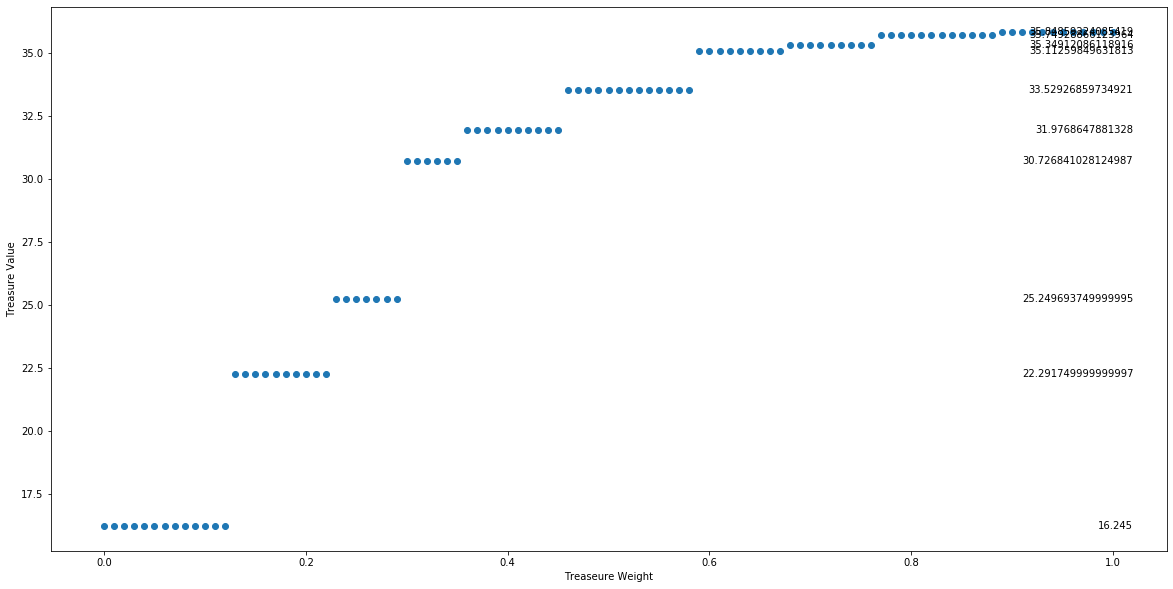

In [6]:
import matplotlib.pyplot as plt

y = []
u = []
weights_line = np.arange(0, 1.01, 0.01)

for w in weights_line:
    val = get_best_sol([w, 1-w])
    u.append(w * val[0] + (1-w) * val[1])
    y.append(val[0])
#     print(w, val)

plt.figure(figsize=(20, 10))
plt.scatter(x=weights_line, y=y)
plt.xlabel("Treaseure Weight")
plt.ylabel("Treasure Value")

for sol in solutions:
#     plt.hlines(sol[0], 0, 1, linestyles='dashed')
    plt.text(1.02, sol[0], sol[0], ha='right', va='center')

In [7]:
unique_y = set(y)
unique_y

{16.245,
 22.291749999999997,
 25.249693749999995,
 30.726841028124987,
 31.9768647881328,
 33.52926859734921,
 35.11259849631813,
 35.34912086118916,
 35.74928866123964,
 35.84859224085419}

In [8]:
len(unique_y)

10

In [9]:
print(u[-10:])
print(weights_line[-10:])

[31.467493599512693, 31.954282337439526, 32.44107107536636, 32.92785981329319, 33.41464855122002, 33.901437289146855, 34.388226027073685, 34.87501476500052, 35.36180350292736, 35.84859224085419]
[0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [33]:
hidden_weights = [1, 0.0]

utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1]

max_u = utility(get_best_sol(hidden_weights))
print(max_u)

35.84859224085419


In [36]:
utilities = []
norm_utilities = []
for sol in solutions:
    utilities.append(utility(sol))
print(utilities)
print()
for u in utilities:
    norm_utilities.append((u - min(utilities)) / (max(utilities) - min(utilities)))

print(norm_utilities)

[16.245, 22.291749999999997, 25.249693749999995, 30.726841028124987, 31.9768647881328, 33.52926859734921, 35.11259849631813, 35.34912086118916, 35.74928866123964, 35.84859224085419]

[0.0, 0.308451120881737, 0.4593389639697807, 0.7387340468113087, 0.8024990825583156, 0.8816888448295984, 0.9624561796892389, 0.9745214359935458, 0.9949344192434487, 1.0]


In [364]:
w_list = np.arange(0, 1, 0.01)
u_list = []
for w in w_list:
    sol = get_best_sol([w, 1-w])
    u_list.append(utility(sol) / max_u)
    
    

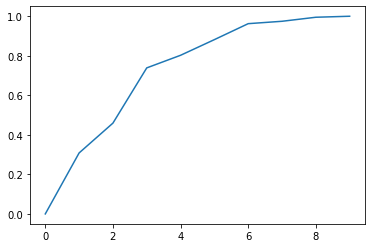

In [32]:
plt.plot(norm_utilities);


In [ ]:
17.1 * 1 +  0.

In [2]:
from collections import namedtuple

Point = namedtuple("Point", ["x", "y"])

def intersection(p1, p2, p3, p4):
    """
    Compute the intersection of the lines defined as
    (p1, p2) and (p3, p4)
    """
    # print(p1, p2, p3, p4)
    numX = (p1.x*p2.y-p1.y*p2.x)*(p3.x-p4.x)-(p1.x-p2.x)*(p3.x*p4.y-p3.y*p4.x)
    numY = (p1.x*p2.y-p1.y*p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x*p4.y-p3.y*p4.x)
    denum = (p1.x-p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x-p4.x)

    px = numX / denum
    py = numY / denum
    # return Point(round(px, 4), round(py, 4))
    return px, py

In [3]:
intersection(Point(0.1, 0), Point(0.1, 3), Point(0, 4), Point(1, 2))

(0.10000000000000002, 3.8000000000000003)

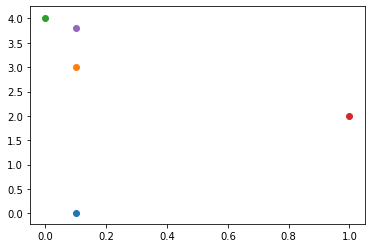

In [7]:
import matplotlib.pyplot as plt
plt.scatter(0.1, 0)
plt.scatter(0.1, 3)
plt.scatter(0, 4)
plt.scatter(1, 2)
plt.scatter(0.1, 3.8)